In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from scipy import stats

In [2]:
master = pd.read_csv('Master/train.csv', skip_blank_lines=True)

Now we are going to check some useful information for the data understanding part

- TODO
    - delete duplicates
    - check for every var outliers
    - check dist of each var
    - check the dispersion of the data in each var
    - assosication of vars with scatter matrix
    - temperature matrix plot
    

#Duplicates

In [6]:
sum(master.duplicated() == True)

0

#Vars outliers

This is a z-score test to check each numerical value

In [42]:
threshold = 3
numcols = master.select_dtypes(include=['number']).columns
# Calculate the z-scores for the 'Value' column
for x in numcols:
    z_scores = stats.zscore(master[x])
# Create a new DataFrame with the z-scores
    z_score_df = pd.DataFrame({'Z-Score': z_scores})
    outliers = master[abs(z_scores) > threshold]

    message = "VARIABLE {}".format(x)
    print(message)
    print(outliers[x])


VAR duration_ms
109       759400
162       896445
375      1331839
377       745386
798       735026
          ...   
14198     705288
14212     737040
14318     730552
14409     678265
14543     817017
Name: duration_ms, Length: 127, dtype: int64
VAR popularity
2529     88
2952     85
5303     84
5892     94
9631     88
10100    84
14482    85
Name: popularity, dtype: int64
VAR danceability
Series([], Name: danceability, dtype: float64)
VAR energy
Series([], Name: energy, dtype: float64)
VAR key
Series([], Name: key, dtype: int64)
VAR loudness
16      -38.615
61      -30.850
101     -31.514
133     -34.450
188     -28.109
          ...  
14744   -37.834
14745   -28.650
14754   -28.457
14832   -33.870
14947   -30.868
Name: loudness, Length: 388, dtype: float64
VAR mode
Series([], Name: mode, dtype: float64)
VAR speechiness
126      0.395
184      0.457
196      0.353
208      0.353
244      0.403
         ...  
14912    0.345
14916    0.402
14928    0.403
14931    0.350
14985    0.512


#Distribution

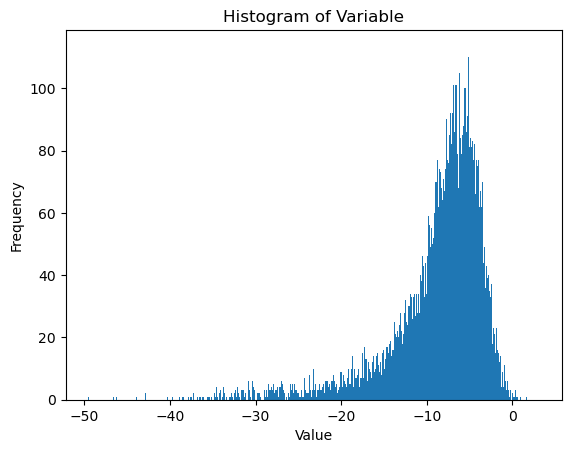

In [53]:
plt.hist(master['loudness'], bins=1000)  # Adjust the number of bins as needed
plt.title('Histogram of Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

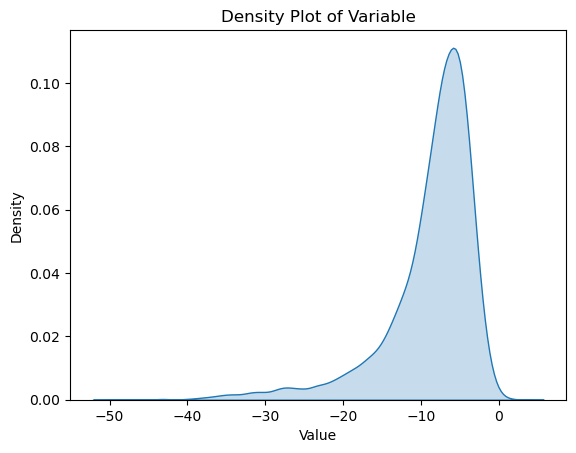

In [62]:
sns.kdeplot(master['loudness'], fill=True)
plt.title('Density Plot of Variable')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#Dispersion of the data

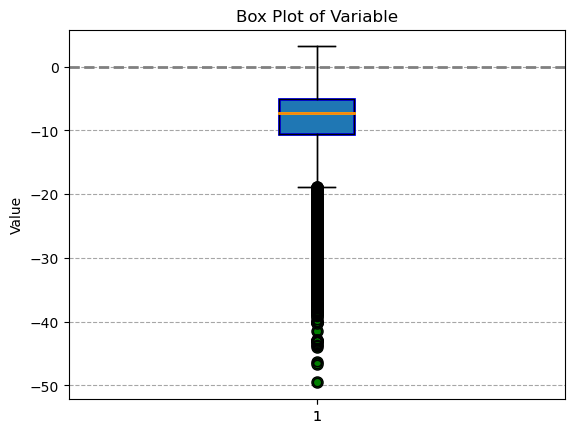

In [61]:
# Create a box plot with custom styling
fig, ax = plt.subplots()
boxprops = dict(linestyle='--', linewidth=2, color='blue', edgecolor='red')
flierprops = dict(marker='o', markerfacecolor='green', markersize=8, linestyle='none')
medianprops = dict(linestyle='-', linewidth=2, color='orange')
box = ax.boxplot(master['loudness'], patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=2)
plt.boxplot(master['loudness'])
plt.title('Box Plot of Variable')
plt.ylabel('Value')
plt.show()

#Association with scatter matrix

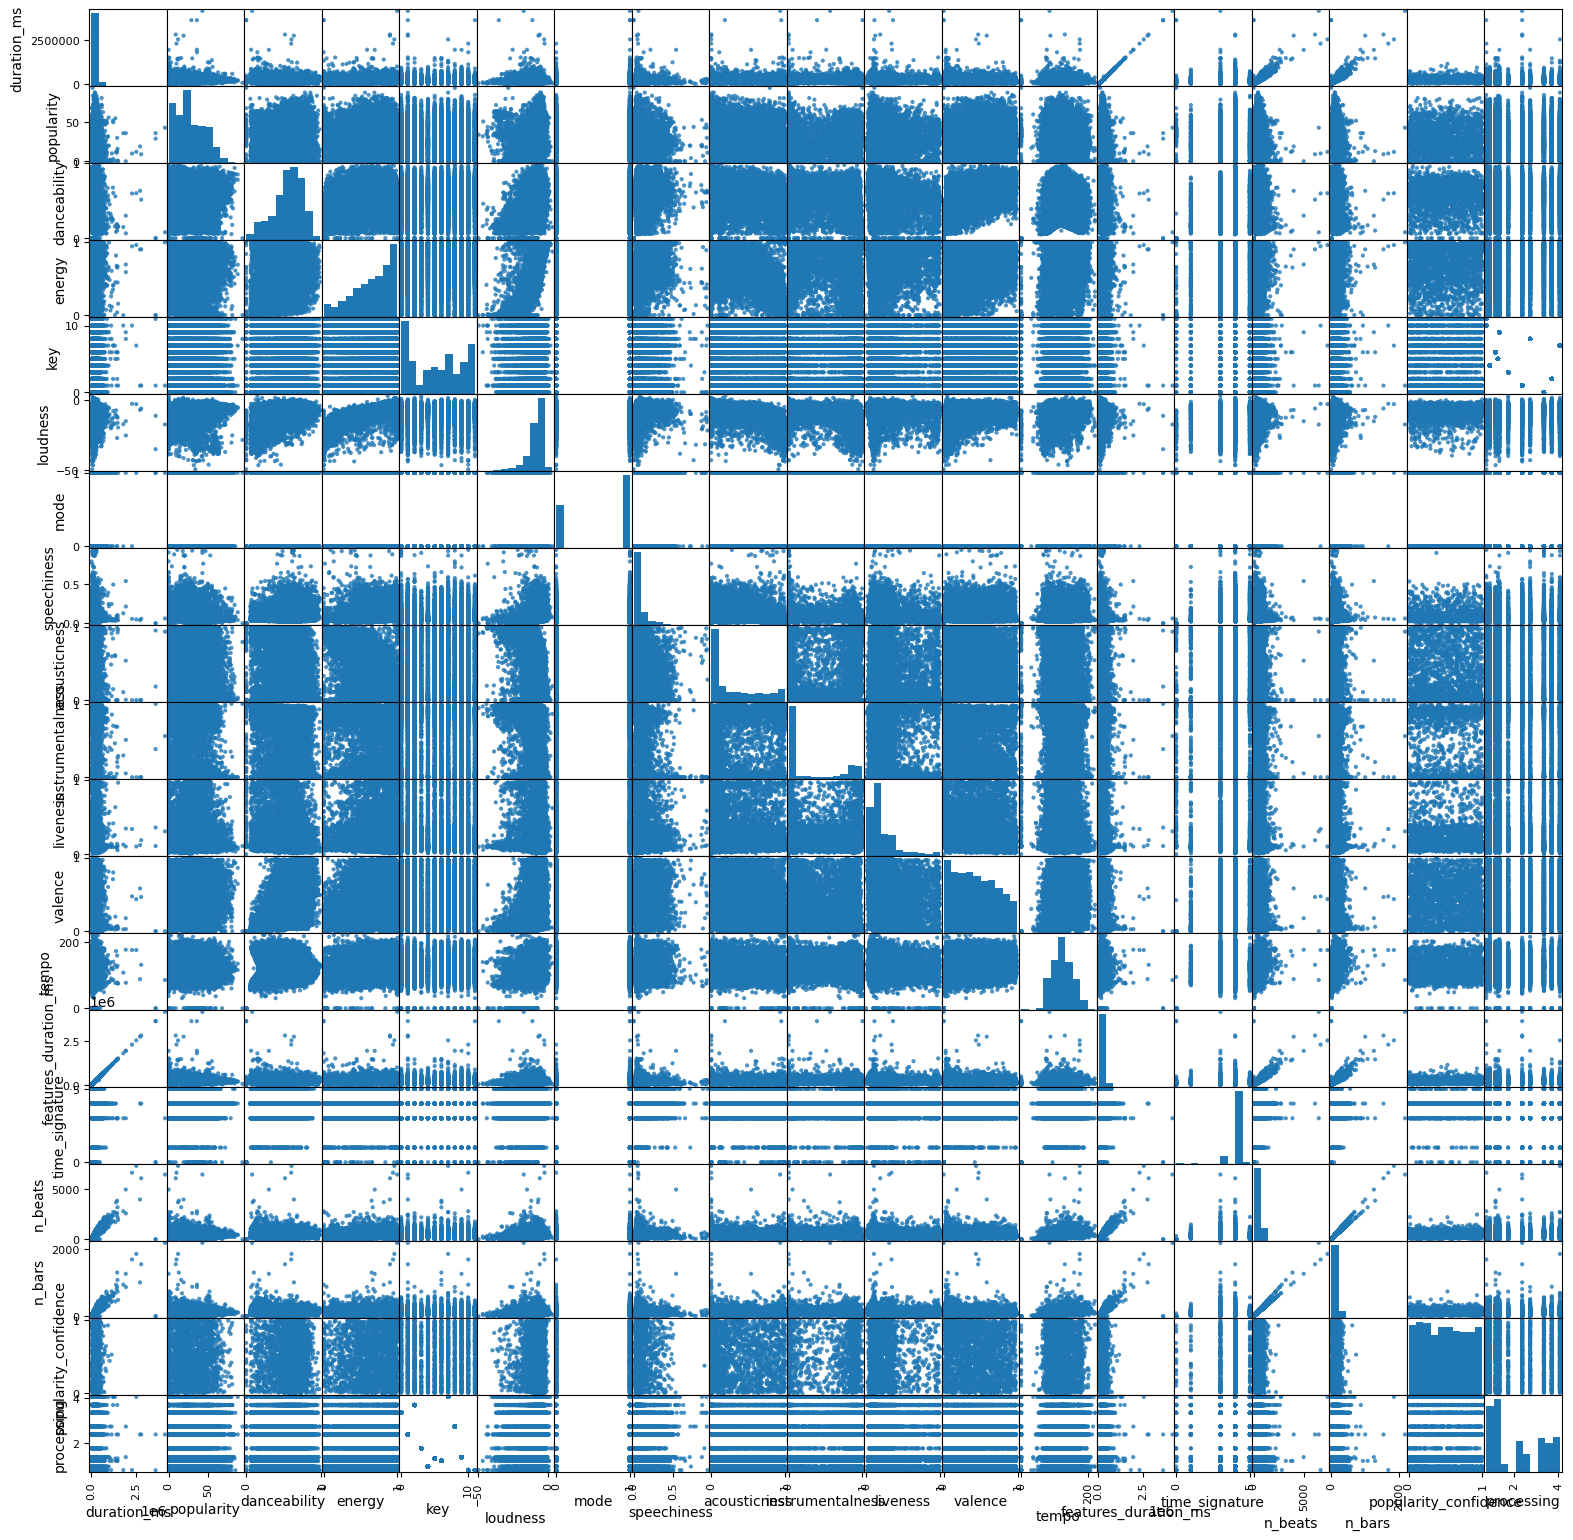

In [70]:
numcols
master_nums = master[numcols]
from pandas.plotting import scatter_matrix
scatter_matrix(master_nums, alpha=0.8, figsize=(19, 19), diagonal='hist')
plt.show()

#Better approximation to association with a heatmap

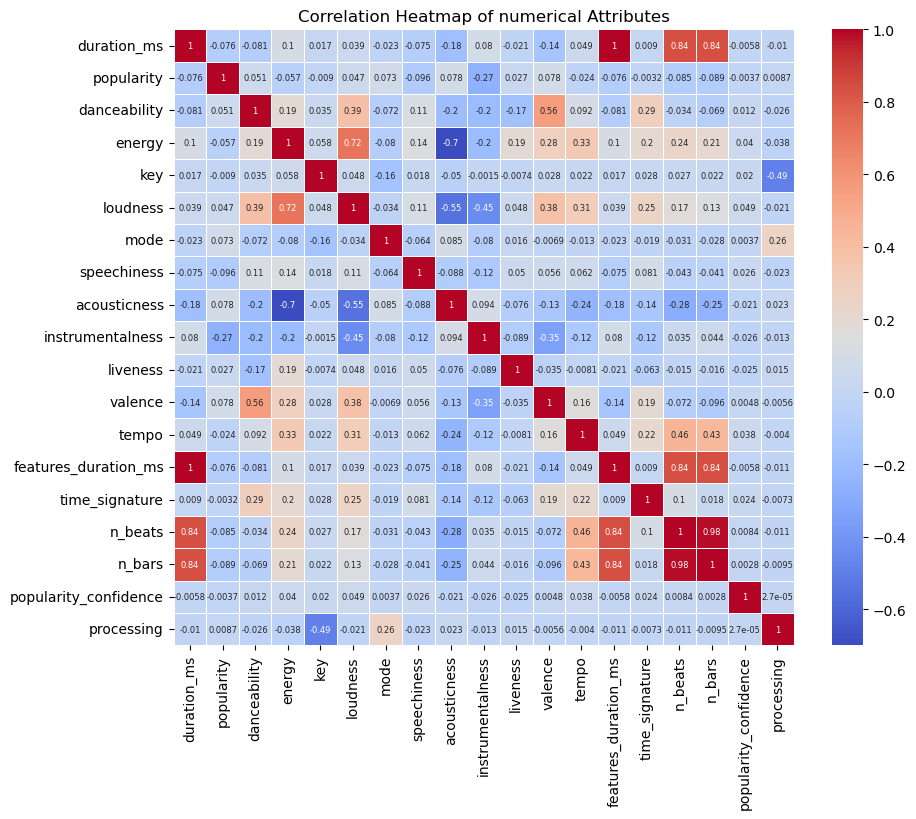

In [77]:
# Create a sample DataFrame with 19 attributes
# Replace this with your actual data

# Calculate the correlation matrix
correlation_matrix = master_nums.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,annot_kws={"size": 6, "va": "center"})
plt.title('Correlation Heatmap of numerical Attributes')
plt.show()
